In [1]:
import pandas as pd
df=pd.read_csv("Play_Tennis.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le_out=LabelEncoder()
le_temp=LabelEncoder()
le_humid=LabelEncoder()
le_wind=LabelEncoder()
le_play=LabelEncoder()

df["out_en"]=le_out.fit_transform(df["outlook"])
df["temp_en"]=le_temp.fit_transform(df["temp"])
df["humid_en"]=le_humid.fit_transform(df["humidity"])
df["wind_en"]=le_wind.fit_transform(df["windy"])
df["play_en"]=le_play.fit_transform(df["play"])

X=df[["out_en","temp_en","humid_en","wind_en"]]
y=df["play_en"]

print(X)
print(y)

    out_en  temp_en  humid_en  wind_en
0        2        1         0        0
1        2        1         0        1
2        0        1         0        0
3        1        2         0        0
4        1        0         1        0
5        1        0         1        1
6        0        0         1        1
7        2        2         0        0
8        2        0         1        0
9        1        2         1        0
10       2        2         1        1
11       0        2         0        1
12       0        1         1        0
13       1        2         0        1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play_en, dtype: int64


In [4]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=42)
model.fit(X,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


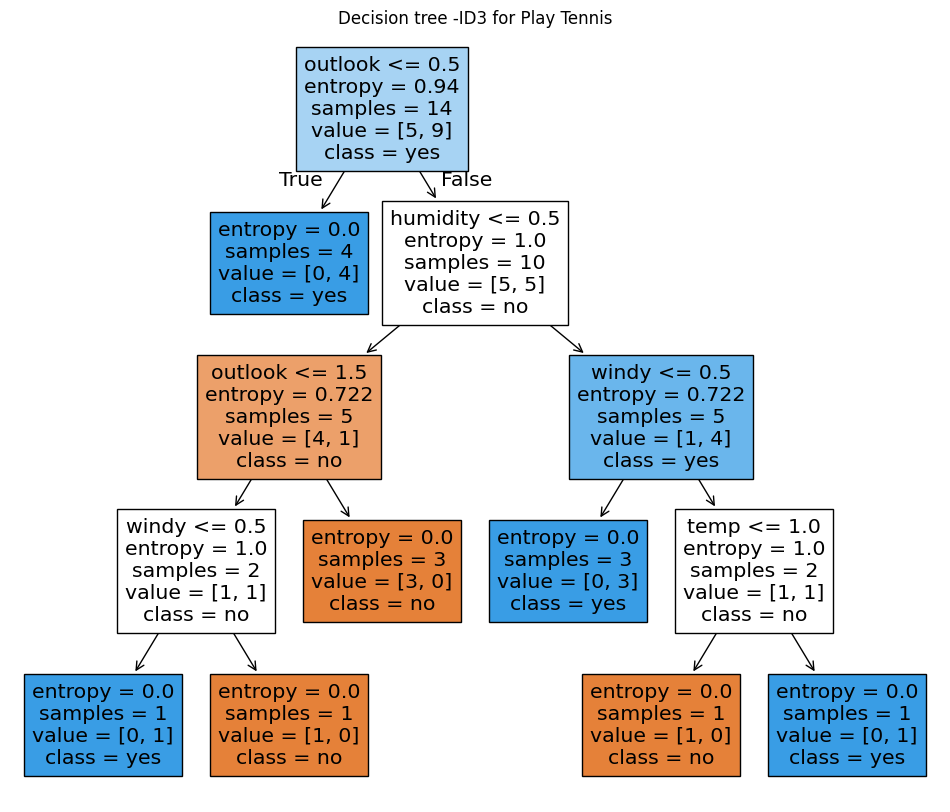

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plot_tree(model,
          feature_names=["outlook","temp","humidity","windy"],
          class_names=le_play.classes_,
          filled=True)
plt.title("Decision tree -ID3 for Play Tennis")
plt.show()

In [8]:
new_sample=[[
    le_out.transform(['sunny'])[0],
    le_temp.transform(['cool'])[0],
    le_humid.transform(['high'])[0],
    le_wind.transform(['True'])[0]
]]
predictions=model.predict(new_sample)
print("predictions for new sample is :",le_play.inverse_transform(predictions)[0])
                     
                              

predictions for new sample is : no


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
